# SEP Spectra Tool
This tool loads energetic particle data and determines an energy spectrum, which is plotted and can be saved as .csv file. 

You can choose between a peak spectrum or a time-integrated spectrum.
An optional pre-event background subtraction can be applied.

You can also study the temporal evolution of the spectrum in an event using time slices of a given duration over a chosen time interval 

<img src="spectra/spec_example.png" alt="segmented regression" width="500px">

# Table of Contents:
- [1. Selecting data source](#1.-Selecting-data-source)
- [2. Data loading](#2.-Data-loading)
- [3. Select spectral type and time intervals](#3.-Select-spectral-type-and-time-intervals)
- [4. Quicklook time series plot](#4.-Quicklook-intensity-time-series-plot)
- [5. Determine and plot spectrum](#5.-Determine-and-plot-spectrum)
    -  [5.1 Save spectrum data as .csv file](#5.1-Save-spectrum-data-file-as-.csv)
- [6. Spectral temporal evolution](#6.-Spectral-temporal-evolution)
    - [6.1 Determine time interval and duration for spectra slices](#6.-Spectral-temporal-evolution)
    - [6.2 Determine spectra for each time slice and save output](#6.2-Determine-spectra-for-each-time-slice-and-save-output-(.csv-and-.png))
    - [6.3 Display the animated gif from all spectra slice plots](#6.3-Display-the-animated-gif-from-all-spectra-slice-plots)

In [ ]:
# load libraries
import os
import datetime as dt
import pandas as pd
import numpy as np
from spectra import Event
import spectra.widgets as w
from seppy.util import jupyterhub_data_path
from IPython.display import Image, display, HTML

## 1. Selecting data source

Select spacecraft, instrument, and particle species.

In [ ]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', index=2, options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', …

Dropdown(description='Sensor:', options=('HET', 'EPT'), value='HET')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

## 2. Data loading

Define time interval. Optional: Select time averaging.

In [ ]:
# Define period for data loading; the format is (year, month, day, hour, minute, second), with hour, minute, and second optional
startdate = dt.datetime(2021, 10, 28,9)
enddate = dt.datetime(2021, 10, 29, 20)

# Choose the time averaging (resampling). This is used for the time series plots and will affect the spectrum if spectral_type == 'peak'
resample = '5min'  # for example: '5min', '60s', None

# Set your local path where you want to save the data files. 
data_path = f"{os.getcwd()}{os.sep}data"
data_path = jupyterhub_data_path(data_path)

# loading the data
E = Event()
E.load_data(w.spacecraft_drop.value, w.sensor_drop.value, w.species_drop.value, startdate, enddate, w.view_drop.value, resample, data_path)

## 3. Select spectral type and time intervals

Provide time interval for the spectrum derivation and optional background subtraction. Choose spectral type (`'peak'` or `'integral'` spectrum).

In [ ]:
spectral_type = 'peak'  # 'integral' or 'peak'

# interval for spectral integration or peak search:
spec_start = dt.datetime(2021, 10, 28, 15)
spec_end = dt.datetime(2021, 10, 29, 9)

# choose if background subtraction is used and define background interval if True
subtract_background = True
background_start = dt.datetime(2021, 10, 28, 12)
background_end = dt.datetime(2021, 10, 28, 15)  

## 4. Quicklook intensity time series plot
Use this plot to check your chosen time intervals! If you want to change the time intervals, go back to the respective cell above.

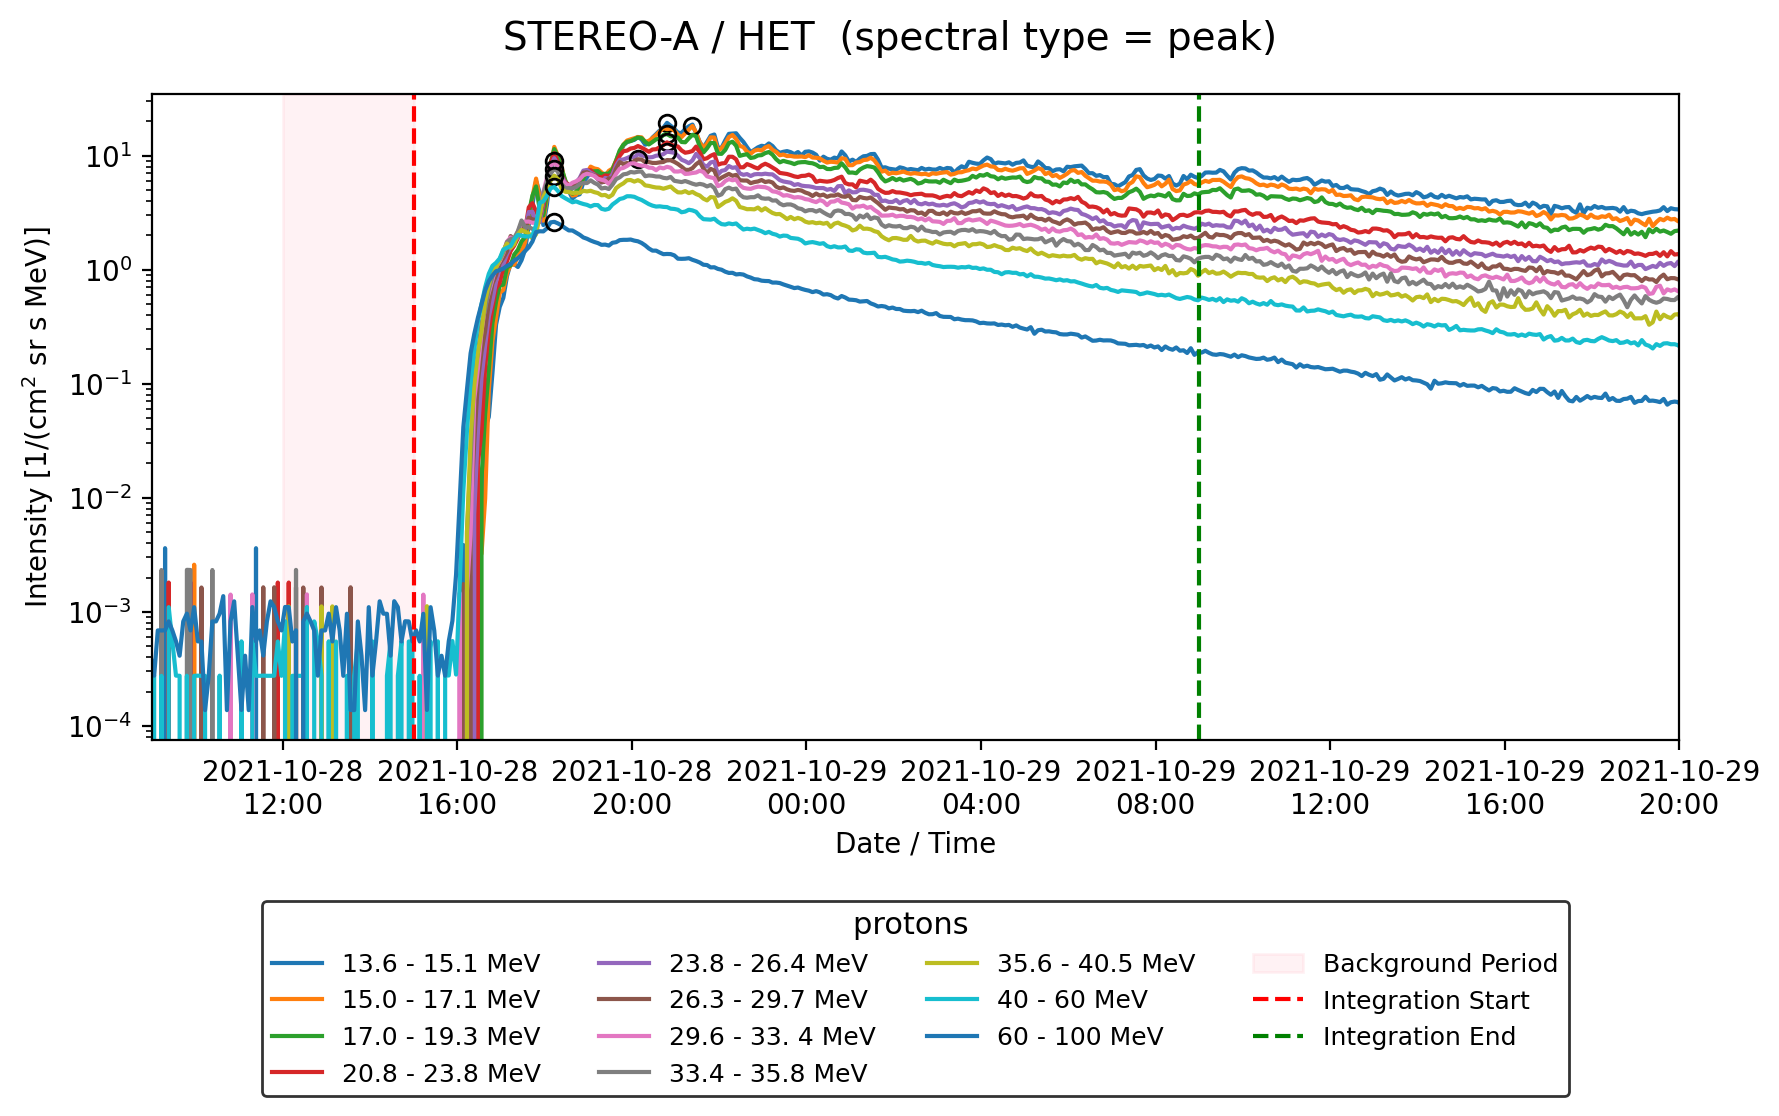

In [ ]:
fig_ts, ax_ts = E.plot_flux(spec_start, spec_end, subtract_background=subtract_background, background_start=background_start, background_end=background_end, savefig=False, spec_type=spectral_type)

## 5. Determine and plot spectrum
Save the spectrum plot as a png file by using `savefig=True`.

Figure saved as output_spectra/spectrum_peak spec_STEREO-A_HET__protons.png


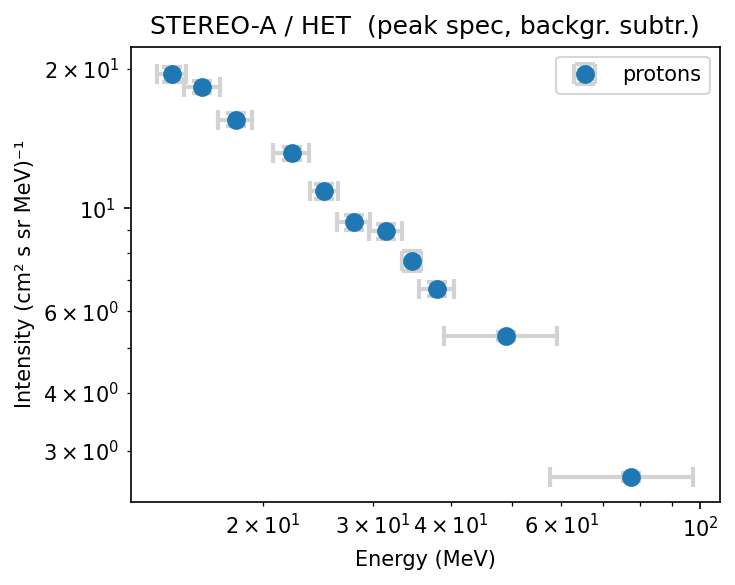

In [ ]:
E.get_spec(spec_start, spec_end, spec_type=spectral_type, subtract_background=subtract_background, background_start=background_start, background_end=background_end)

fig, ax = E.plot_spectrum(savefig=True)

### 5.1 Save spectrum data as .csv file

In [ ]:
foldername = f'output_spectra{os.sep}'
filename = f'{foldername}spectrum_{spectral_type}_{E.spacecraft.upper()}_{E.instrument.upper()}_{E.viewing}_{E.species}.csv'

E.spec_df.to_csv(filename, index=False)

# 6. Spectral temporal evolution
### 6.1 Determine time interval and duration for spectra slices and show in time series plot

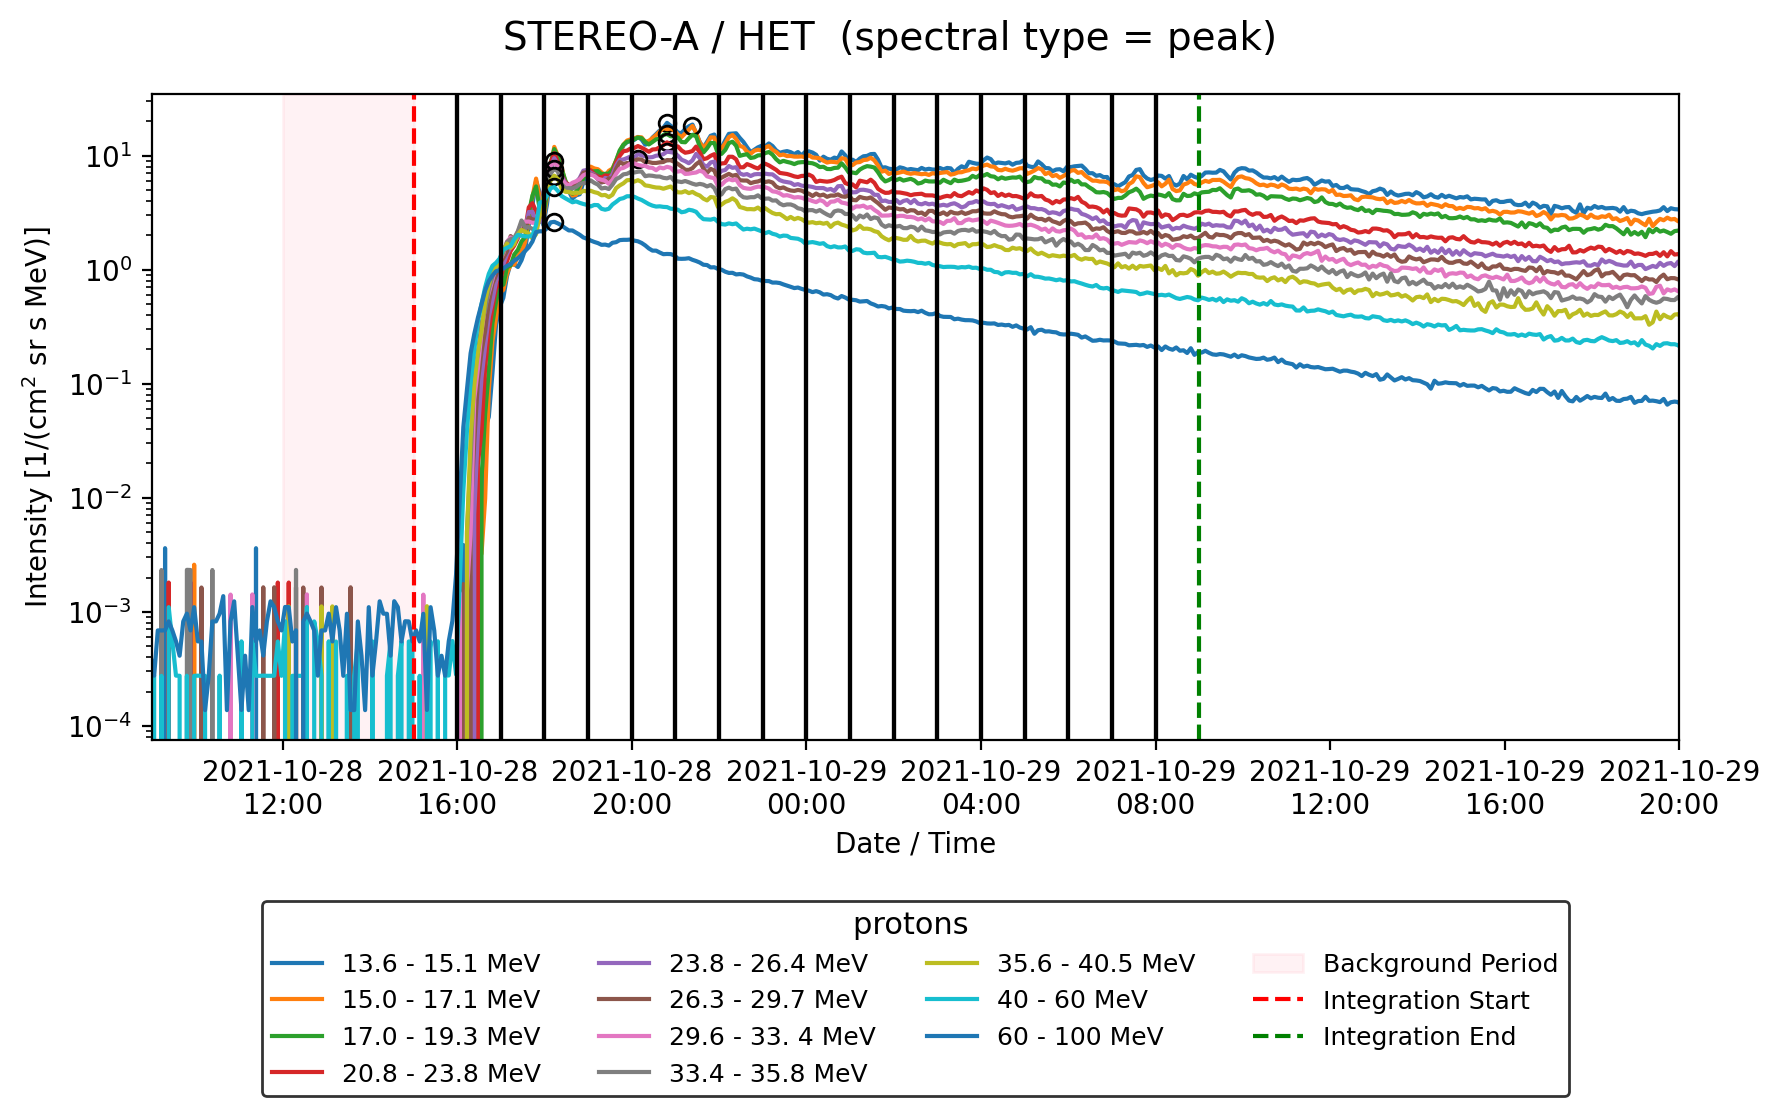

In [ ]:
# provide input:
duration = pd.Timedelta(hours=1)  # add other examples (10min etc); make code easier with clear input by the user
interval_start = spec_start
interval_end = spec_end
num_steps = int((interval_end-interval_start) / duration)

for i in np.arange(1, num_steps, 1): 
    time = interval_start + i * duration
    ax_ts.axvline(time, color='k')
    
fig_ts

## 6.2 Determine spectra for each time slice and save output (.csv and .png)
This also creates an animated gif out of all spectra (run next cell to watch the animation). Output files are saved in a subfolder "output_spectra".

In [ ]:
E.get_spec_slices(interval_start, interval_end, duration, subtract_background=subtract_background, background_start=background_start, background_end=background_end)

## 6.3 Display the animated gif from all spectra slice plots

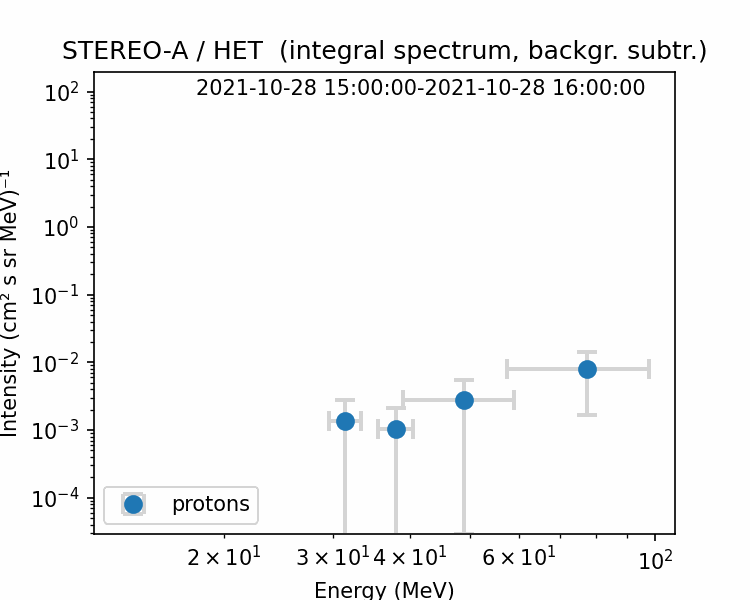

In [ ]:
gif_path = E.gif_filename
gif = Image(filename=gif_path)
display(gif)

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).